In [10]:
from bs4 import BeautifulSoup, Tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Places of Origin

Where do international students come from? (Source: [IIE](https://www.iie.org/Research-and-Insights/Open-Doors/Data/International-Students/Places-of-Origin))

In [3]:
# @param year Two-digit year of the 21st century
def getPlacesOfOrigin(year):
    r = requests.get(
        f'https://www.iie.org/Research-and-Insights/Open-Doors/Data/International-Students/Places-of-Origin/All-Places-of-Origin/{year}-{str(year + 1)[-2:]}'
    )
    table = BeautifulSoup(r.content).table
    table.tr.decompose() # delete first row
    for td in table.tr.findAll('td'): # make the current first row headers for pandas parser
        td.name = 'th'

    df = pd.read_html(str(table))[0]
    df = df[pd.notnull(df['Place of Origin'])]
    df = df.set_index('Place of Origin')
    return df

In [16]:
data = []
years = np.arange(2000, 2019)
for year in years[:-3]:
    # Every table has the previous year's data, so we only
    # store this data if it is the first table
    df = getPlacesOfOrigin(year if year > 2000 else year + 1)
    data.append(df[[f'{year}/{str(year+1)[-2:]}']])
    print(f'Successfully scanned {year} data.')

Successfully scanned 2000 data.
Successfully scanned 2001 data.
Successfully scanned 2002 data.
Successfully scanned 2003 data.
Successfully scanned 2004 data.
Successfully scanned 2005 data.
Successfully scanned 2006 data.
Successfully scanned 2007 data.
Successfully scanned 2008 data.
Successfully scanned 2009 data.
Successfully scanned 2010 data.
Successfully scanned 2011 data.
Successfully scanned 2012 data.
Successfully scanned 2013 data.
Successfully scanned 2014 data.
Successfully scanned 2015 data.


In [31]:
# Hard-code data from 2016, 2017, 2018 that weren't available in
# aggregate, table form
moreRecentData = {
    'Iraq': [1901, 1698, 1438],
    'Libya': [1514, 1311, 1064],
    'Somalia': [35, 50, 67],
    'Sudan': [253, 324, 331],
    'Syria': [783, 827, 726],
    'Yemen': [599, 658, 517],
    'Iran': [12269, 12643, 12783],
}

In [34]:
def plotCountries(countries, title="International students"):
    plt.figure(figsize=(16, 8))
    plt.title(title)

    for c in countries:
        plt.plot([int(df.loc[c].iloc[0]) for df in data] + moreRecentData[c], label=c)

    plt.xticks(np.arange(0, len(years), 1.0))
    plt.xlabel('Years since 2000')
    plt.ylabel('Number of students')
    plt.legend()
    plt.grid()

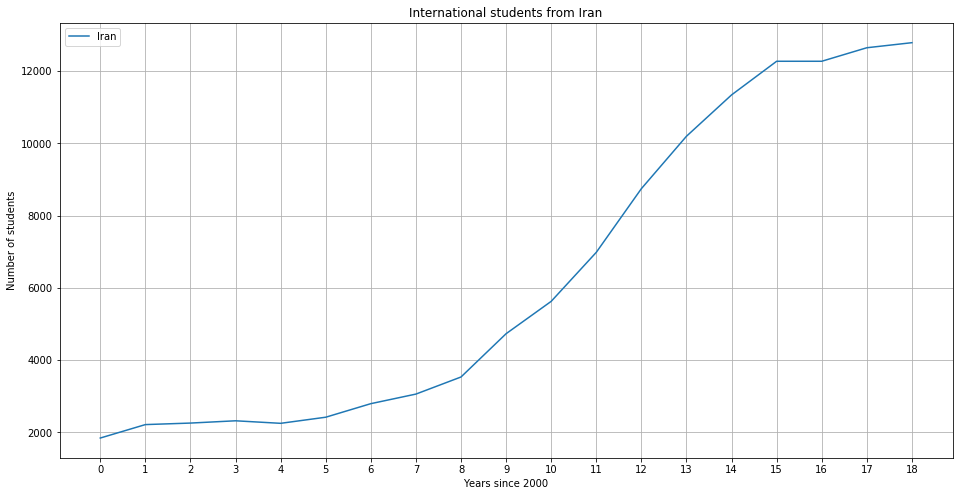

In [35]:
plotCountries(['Iran'], title="International students from Iran")

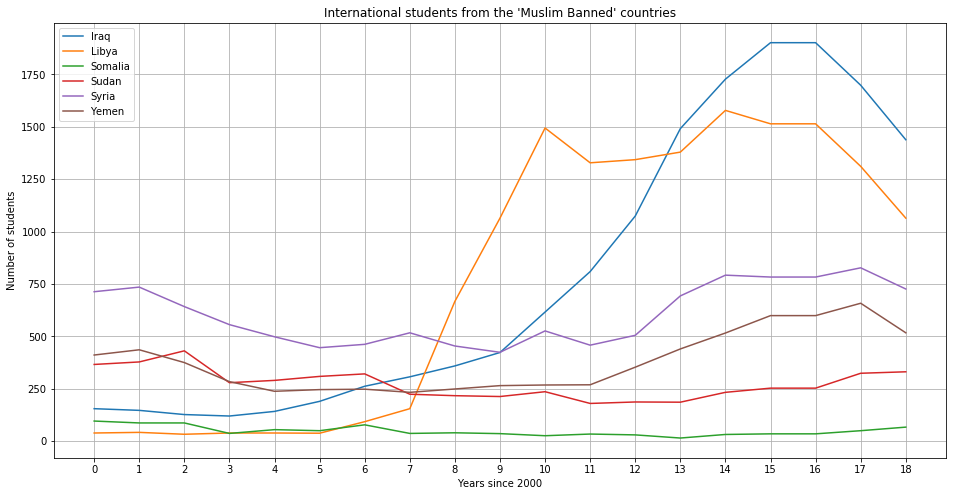

In [36]:
countries = ['Iraq', 'Libya', 'Somalia', 'Sudan', 'Syria', 'Yemen']
plotCountries(countries, title="International students from the 'Muslim Banned' countries")